# Functional API demo

In [ ]:
from keras.models import Model

In [5]:
model = Model(inputs = x ,outputs = [output1,output2])

In [2]:
from keras.layers import *

In [3]:
x = Input(shape=(3,))

In [6]:
# Define the first hidden layer with 128 units and ReLU activation
hidden1 = Dense(128, activation='relu')(x)

# Define the second hidden layer with 64 units and ReLU activation, taking the output of hidden1 as input
hidden2 = Dense(64, activation='relu')(hidden1)

# Define the first output layer (e.g., for regression) with 1 unit and a linear activation function
output1 = Dense(1, activation='linear')(hidden2)

# Define the second output layer (e.g., for binary classification) with 1 unit and a sigmoid activation function
output2 = Dense(1, activation='sigmoid')(hidden2)


In [7]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │        512 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

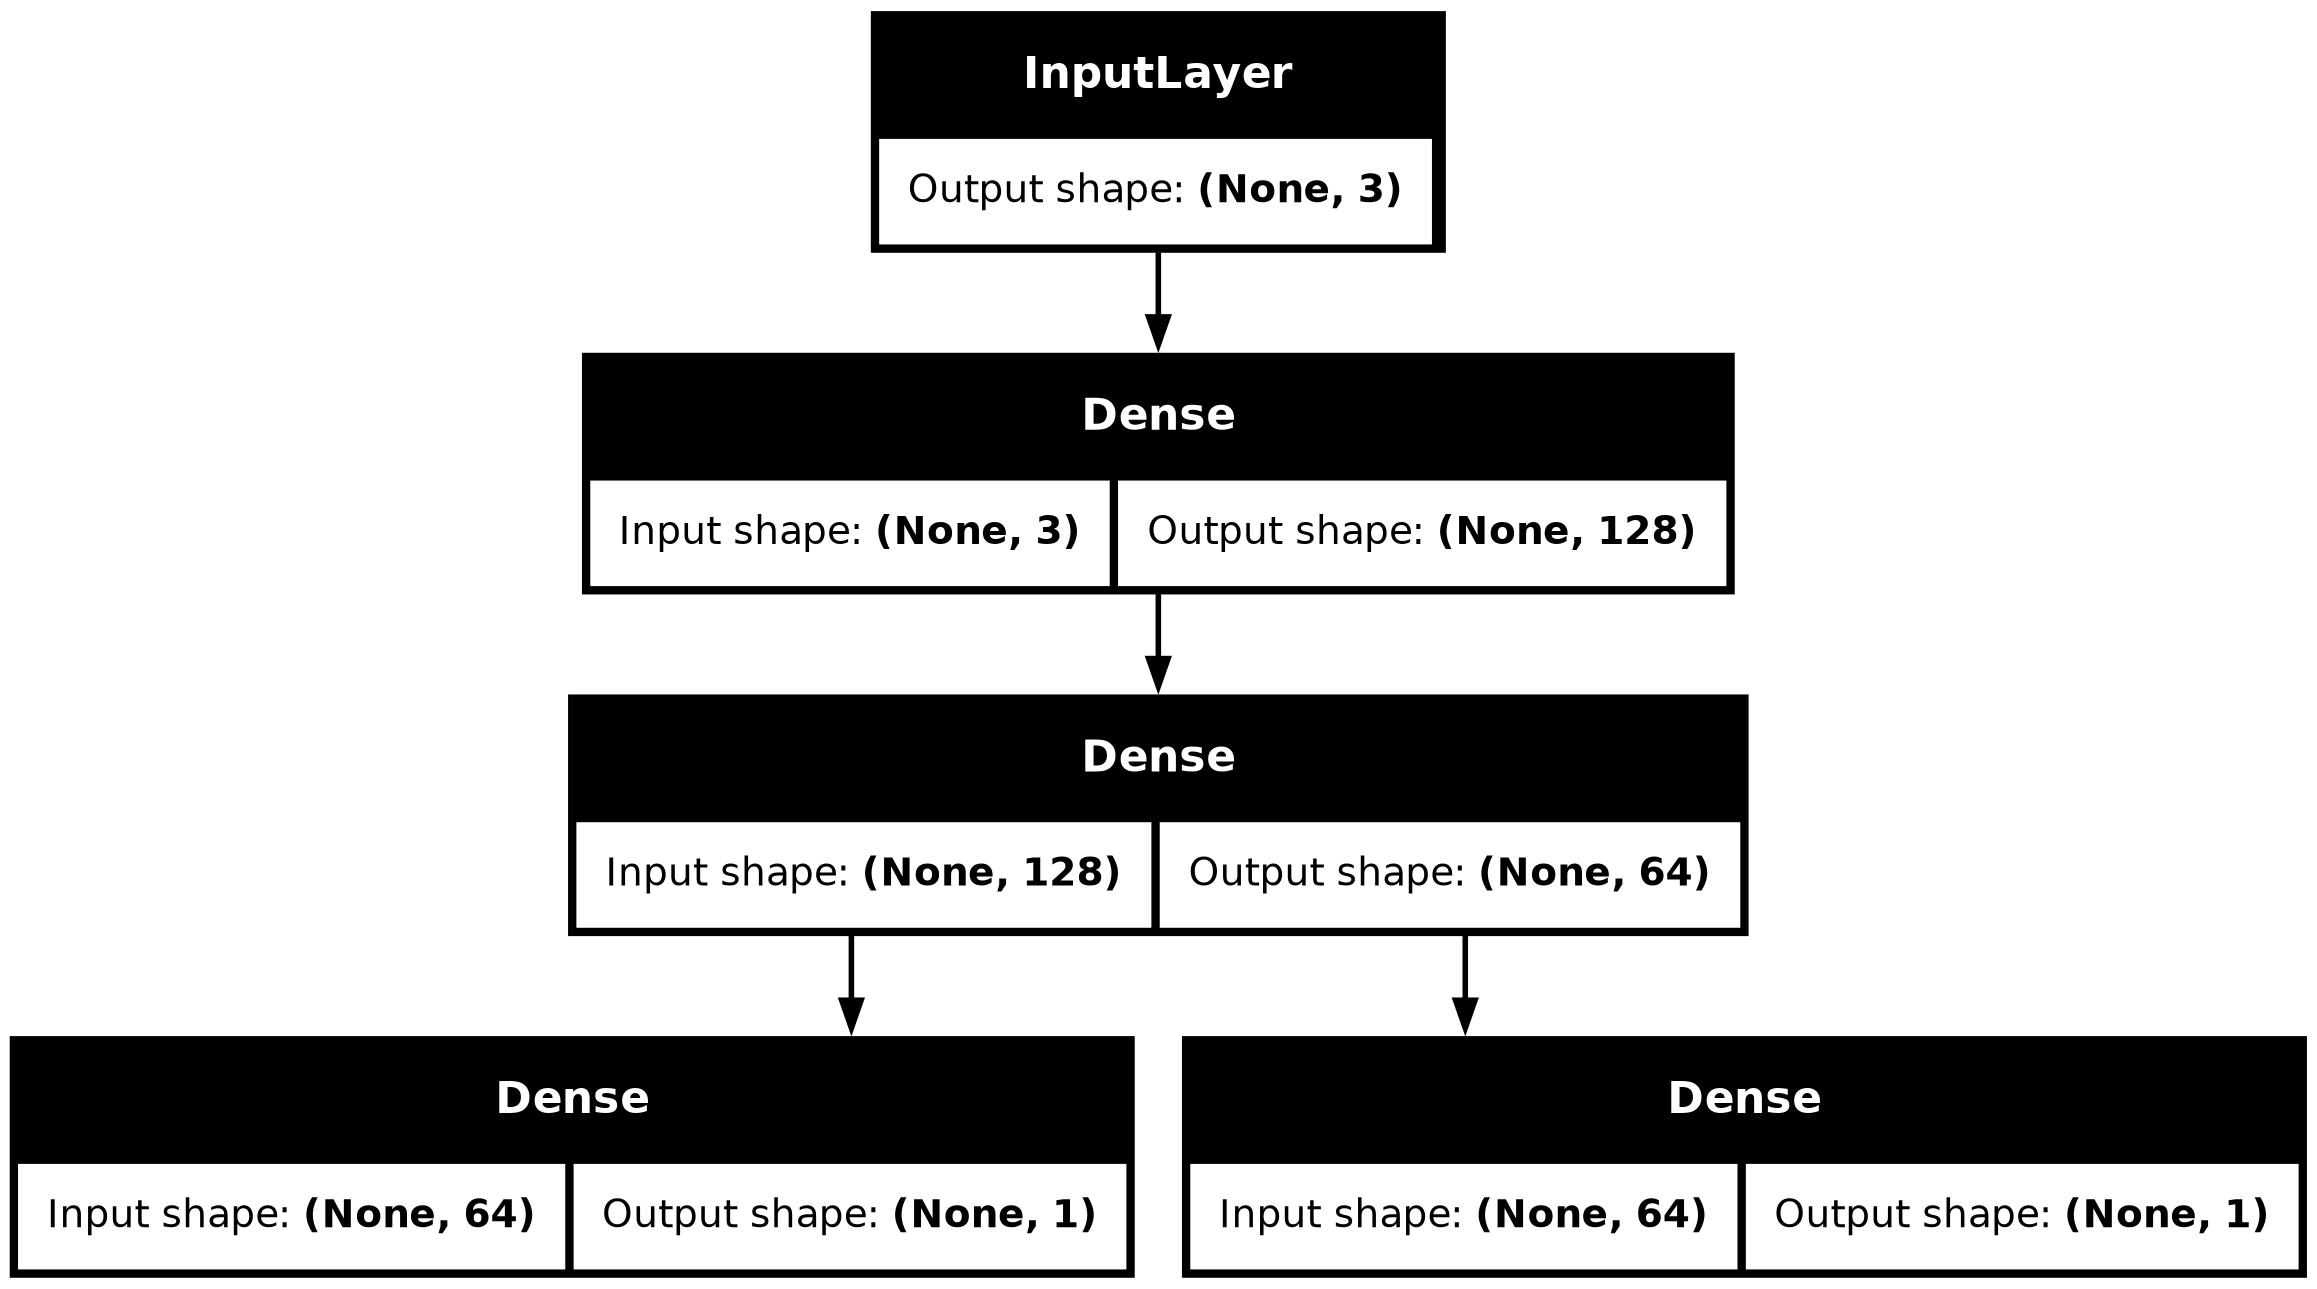

In [8]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

# Functional-api-multiple-input

### Define two sets of inputs

In [12]:
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

#### First branch operates on the first input

In [13]:
x = Dense(8, activation="relu")(inputA)
x1 = Dense(4, activation="relu")(x)

### Second branch opreates on the second input

In [14]:
y = Dense(64, activation="relu")(inputB)
y1 = Dense(32, activation="relu")(y)
y2 = Dense(4, activation="relu")(y1)

### combine the output of the two branches

In [15]:
combined = concatenate([x1, y2])

### Apply a FC layer and then a regression prediction on the
### Combined outputs

In [16]:
z = Dense(2, activation="relu")(combined)
z1 = Dense(1, activation="linear")(z)

### Our model will accept the inputs of the two branches and
### Then output a single value

In [17]:

model = Model(inputs=[inputA, inputB], outputs=z1)

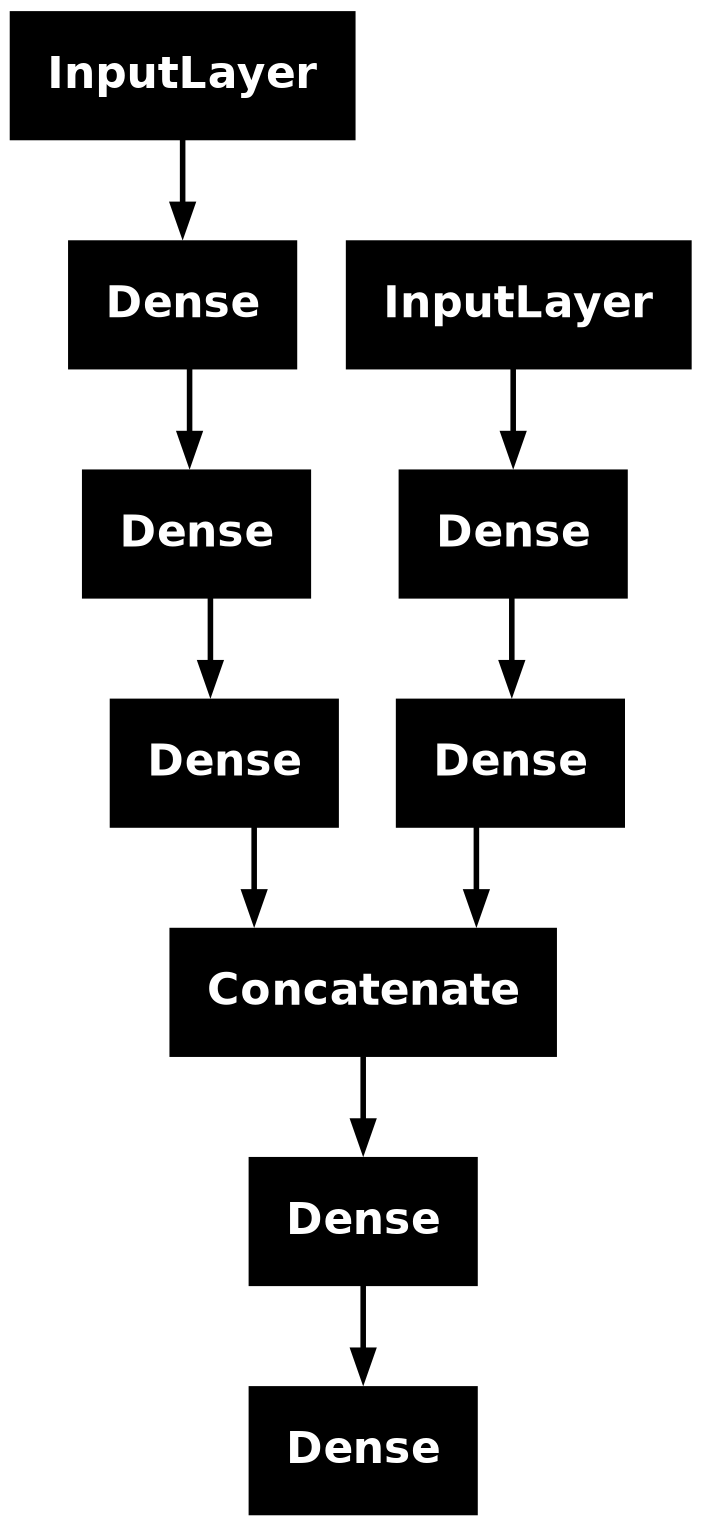

In [18]:
from keras.utils import plot_model
plot_model(model)